# Demos: Lecture 14

## Demo 1: Quantum phase estimation

<img src="fig/qpe_full.png" width="800px">


In [1]:
import pennylane as qml

wires = list(range(4))
est_wires = wires[:3]
target_wire = wires[-1]

dev = qml.device("default.qubit", wires=wires, shots=1)

In [2]:
def prepare_eigenstate(wire):
    qml.PauliX(wires=wire)

def hadamard_transform(wires):
    for wire in wires:
        qml.Hadamard(wires=wire)

def controlled_operations(est_wires, target_wire):
    qml.ctrl(qml.PauliZ, control=est_wires[0])(wires=target_wire)
    qml.ctrl(qml.S, control=est_wires[1])(wires=target_wire)
    qml.ctrl(qml.T, control=est_wires[2])(wires=target_wire)

In [8]:
@qml.qnode(dev)
def QPE():
    prepare_eigenstate(target_wire)

    # Manual implementation
    
    # hadamard_transform(est_wires)
    # controlled_operations(est_wires, target_wire)
    # qml.adjoint(qml.QFT)(wires=est_wires)

    # Built-in implementation
    qml.QuantumPhaseEstimation(qml.matrix(qml.T)(wires=0), estimation_wires=est_wires, target_wires=target_wire)
    
    return qml.sample(wires=est_wires)

QPE()

array([0, 0, 1])

(<Figure size 500x500 with 1 Axes>, <Axes: >)

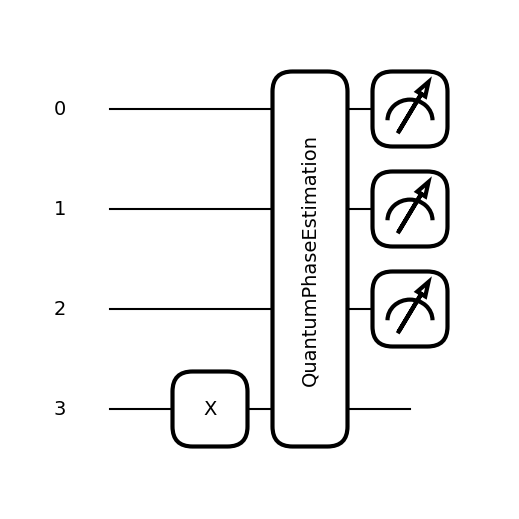

In [9]:
qml.draw_mpl(QPE)()